In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lsp/.virtualenvs/kaggle/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Plot parameters
sns.set()
# Seven hls color palette
current_palette_7 = sns.color_palette("hls", 7)
sns.set_palette(current_palette_7)

%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# rcParams.keys()

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

# 2.5 Norms

Norms are any functions that are characterized by the following properties:

1- Norms are non-negative values. If you think of the norms as a length, you easily see why it can't be negative.

2- Norms are 0 if and only if the vector is a zero vector

3- Norms respect the triangle inequity. See bellow.

4- $||k\cdot u||=|k|\cdot||u||$. The norm of a vector multiplied by a scalar is equal to the absolute value of this scalar multiplied by the norm of the vector.

### The triangle inequity

The norm of the sum of some vectors is less than or equal the sum of the norms of these vectors.

$
||u+v|| \leq ||u||+||v||
$

#### Example

$
u=
\begin{bmatrix}
    1 & 6
\end{bmatrix}
$
and
$
v=
\begin{bmatrix}
    4 & 2
\end{bmatrix}
$

$
||u+v|| = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43
$

$
||u||+||v|| = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55
$


Let's check these results:

In [5]:
u = np.array([1, 6])
v = np.array([4, 2])
print 'u = ', u
print 'v = ', v
print 'u + v =', u+v
print '||u + v|| = ', np.linalg.norm(u+v)
print '||u|| + ||v|| = ', np.linalg.norm(u)+np.linalg.norm(v)

u =  [1 6]
v =  [4 2]
u + v = [5 8]
||u + v|| =  9.43398113206
||u|| + ||v|| =  10.5548984853


Geometrically, this simply means that the shortest path between two points is a line:

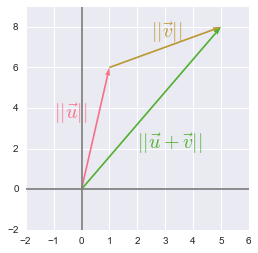

In [6]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette("husl"))
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette("husl")[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette("husl")[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette("husl")[2], size=20)

plt.show()
plt.close()


### P-norms: general rules

$
||x||_p=(\sum\limits_i|x_i|^p)^{1/p}
$


To get the p-norm of a vector:

- Take every elements of the vector and get their absolute value
- Use the power $p$ of this absolute value
- Sum the result to end with one value for the whole vector
- Take the power $\frac{1}{p}$ of this result

This will be clear with examples using spreadly used p-norms.

### The $L^0$ norm

It is the number of non-zero elements in the vector. It is not really a norm because if you multiply the vector by $\alpha$, this number is the same (rule #4 above).

### The $L^1$ norm

$p=1$ so we have:

$
||x||_1=\sum \limits_i|x_i|
$

### The Euclidean norm ($L^2$ norm)

The Euclidean norm is the p-norm with $p=2$:

$
||x||_2=(\sum \limits_i|x_i|^2)^{1/2}\Leftrightarrow \sqrt{\sum \limits_i|x_i|^2}
$


#### Example

Graphically, the Euclidean norm corresponds to the length of the vector from the origin to the point obtained by linear combination (like applying Pythagorean theorem).

$
u=
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
$

$
\begin{align*}
||u||_2 &=\sqrt{|3|^2+|4|^2}\\\\
&=\sqrt{25}\\\\
&=5
\end{align*}
$


So the Euclidean norm is $5$.

The Euclidean norm can be calculated with the `linalg.norm` function from numpy. We can check the result:

In [7]:
print "np.linalg.norm([3, 4]) = ", np.linalg.norm([3, 4])

np.linalg.norm([3, 4]) =  5.0


Here is the graphical representation of the vectors:

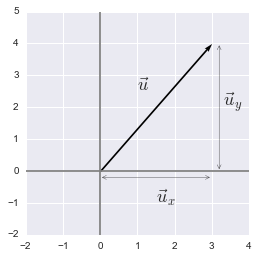

In [8]:
u = [0,0,3,4]

plt.quiver([u[0]],
           [u[1]],
           [u[2]],
           [u[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.annotate('', xy = (3.2, 0), xytext = (3.2, 4),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('', xy = (0, -0.2), xytext = (3, -0.2),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))

plt.text(1, 2.5, r'$\vec{u}$', size=18)
plt.text(3.3, 2, r'$\vec{u}_y$', size=18)
plt.text(1.5, -1, r'$\vec{u}_x$', size=18)

plt.show()
plt.close()

In this case, the vector is in a 2-dimensional space but this stands also for more dimensions.

$
u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}
$

$
||u||_2 = \sqrt{u_1^2+u_2^2+\cdots+u_n^2}
$


### The squared Euclidean norm (squared $L^2$ norm)

$
\sum \limits_i|x_i|^2
$


The squared Eculidean norm is the sum of the Euclidean norm. This operation thus removes the square root and we end up with the sum of every squared values of the vector. 

The squared Euclidean norm is widely used in machine learning parly because it can be calculated with the vector operation $\boldsymbol{x}^\text{T}\boldsymbol{x}$. There can be performance gain due to the optimization of the linear algebra operations. See [here](https://softwareengineering.stackexchange.com/questions/312445/why-does-expressing-calculations-as-matrix-multiplications-make-them-faster) and [here](https://www.quora.com/What-makes-vector-operations-faster-than-for-loops) for more details.

#### Example 1.

$
\boldsymbol{x}=
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}
$

$
\boldsymbol{x}^\text{T}=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix}
$

$
\boldsymbol{x}^\text{T}\boldsymbol{x}=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} \times
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix} = 2\times 2 + 5\times 5 + 3\times 3 + 3\times 3= 47
$

In [9]:
x = np.array([2, 5, 3, 3])
# Without the reshape, the shape of x would be (4, ) and couldn't be transposed
x = x.reshape(4, 1)
x
print 'x:\n', x
print '\nx.T: ', x.T

# The order is important: np.dot(x, x.T) is different of np.dot(x.T, x).
euclideanNorm = np.dot(x.T, x)
print 'Euclidean norm of x:', euclideanNorm
print 'Euclidean norm of x from `linalg`:', np.linalg.norm(x)**2

x:
[[2]
 [5]
 [3]
 [3]]

x.T:  [[2 5 3 3]]
Euclidean norm of x: [[47]]
Euclidean norm of x from `linalg`: 47.0


#### Derivative of the squared $L^2$ norm

Also, the partial derivative of the squared $L^2$ norm is easily computed:

$
u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}
$

$
||u||_2 = u_1^2+u_2^2+\cdots+u_n^2
$

$
\begin{cases}
\dfrac{d||u||_2}{du_1} = 2u_1\\\\
\dfrac{d||u||_2}{du_2} = 2u_2\\\\
\cdots\\\\
\dfrac{d||u||_2}{du_n} = 2u_n
\end{cases}
$

#### Derivative of the $L^2$ norm

In the case of the $L^2$ norm, the derivative is more complicated and take every elements of the vector into account:

$
||u||_2 = \sqrt{(u_1^2+u_2^2+\cdots+u_n^2)} = (u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}
$

$
\begin{align*}
\dfrac{d||u||_2}{du_1} &=
\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}-1}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{-\frac{1}{2}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
2\cdot u_1\\\\
&=\dfrac{2\cdot u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{align*}
$

$
\begin{cases}
\dfrac{d||u||_2}{du_1} = 2u_1\\\\
\dfrac{d||u||_2}{du_2} = 2u_2\\\\
\cdots\\\\
\dfrac{d||u||_2}{du_n} = 2u_n
\end{cases}
$

One problem of the squared $L^2$ norm is that it hardly discriminates between 0 and small values because the increase of the function is slow.

We can see this by graphically comparing the squared $L^2$ norm with the $L^2$ norm. The z-axis correspond to the norm and the x- and y-axis correspond to 2 parameters. The same thing is true with more than 2 dimensions but it would be hard to visualize.

$L^2$ norm:

![L2Norm.png](images/L2Norm.png)

Squared $L^2$ norm:

![squaredL2Norm.png](images/squaredL2Norm.png)


$L^1$ norm:

![L1Norm.png](images/L1Norm.png)

These plots are done with the help of this nice [website](https://academo.org/demos/3d-surface-plotter/). Go and plot these norms if you need to move them in order to catch their shape.

### The max norm

It is the $L^\infty$ norm and correspond to the absolute value of the greater element of the vector.

$
||x||_\infty = \max\limits_i|x_i|
$

### Matrix norms: the Frobenius norm

$
||A||_F=\sqrt{\sum\limits_{i,j}A^2_{i,j}}
$

This is equivalent to flatten the matrix to have a unique vector and taking the $L^2$ norm.

The same numpy function can be use:

In [55]:
A = np.array([[1, 2], [6, 4], [3, 2]])
print "A =\n", A

print "\nnp.linalg.norm(A) =", np.linalg.norm(A)

A =
[[1 2]
 [6 4]
 [3 2]]

np.linalg.norm(A) = 8.36660026534


### Expression of the dot product with norms

$
x^\text{T}y = ||x||_2\cdot||y||_2\cos\theta
$


#### Example

$
\boldsymbol{x}=
\begin{bmatrix}
    0 \\\\
    2
\end{bmatrix}
$

and 

$
\boldsymbol{y}=
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
$

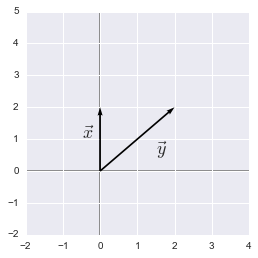

In [88]:
x = [0,0,0,2]
y = [0,0,2,2]

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.text(-0.5, 1, r'$\vec{x}$', size=18)
plt.text(1.5, 0.5, r'$\vec{y}$', size=18)

plt.show()
plt.close()

We took this example for its simplicity. As we can see, the angle $\theta$ is equal to 45°.

$
\boldsymbol{x^\text{T}y}=
\begin{bmatrix}
    0 & 2
\end{bmatrix} \cdot
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
0\times2+2\times2 = 4
$

and

$
||x||_2=\sqrt{0^2+2^2}=\sqrt{4}=2
$

$
||y||_2=\sqrt{2^2+2^2}=\sqrt{8}
$

$
2\times\sqrt{8}\times cos(45)=4
$

Here are the operations using numpy:

In [96]:
# Note: np.cos take the angle in radian
print np.cos(np.deg2rad(45))*2*np.sqrt(8)

4.0


# References

For any derivative problem go [here](https://www.derivative-calculator.net/) to show the steps.